
# Fitting a simple model to data

An example of using scipy.optimize routines to fit a straight line to data points, possibly with known individual measurement errors, while accounting for intrinsic scatter and outliers. The method is easily generalisable to more complicated models and datasets


In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 18

In [3]:
# same data as last week
x = np.array([ 1,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 47, 54, 56, 67, 69, 72, 88])

y = np.array([33, 68, 34, 34, 37, 65, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])

e = np.array([3.6, 3.9, 2.6, 3.4, 3.8, 14.8, 2.2, 2.1, 2.3, 3.8,
              2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

In [4]:
# put this in a function to avoid repeating (DRY)
def niceplot():
    plt.xlabel('resistance, $\Omega$ ohms')
    plt.ylabel('size of universe, $S$ Gpc')
    plt.axis((-10, 100, 20, 90))
    plt.tight_layout()

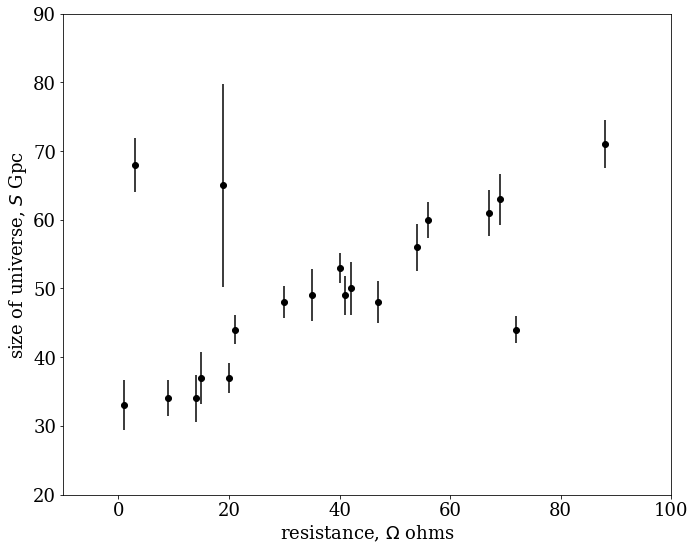

In [5]:
plt.errorbar(x, y, e, fmt='ok')
niceplot()

In [6]:
def model(x, a, b, c):
    return a*x**2 + b*x + c

def residuals(p, x, y, e):
    a, b, c = p
    return (y - model(x, a, b, c)) / e # normalise residual by error

def chisq(p, x, y, e):
    a, b, c = p
    return ((residuals((a, b, c), x, y, e))**2).sum()

In [7]:
result_min = optimize.minimize(chisq, (0, 0, 0), args=(x, y, e))
result_min

# first value 'fun: ' - value of chi^2
# final value: best fit parameter values a, b, c

      fun: 151.94404430161035
 hess_inv: array([[ 7.37787928e-07, -6.21073630e-05,  9.04713334e-04],
       [-6.21073630e-05,  5.62470694e-03, -9.13759881e-02],
       [ 9.04713334e-04, -9.13759881e-02,  1.90418007e+00]])
      jac: array([1.90734863e-06, 0.00000000e+00, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-2.36984044e-04,  2.82080025e-01,  3.76226608e+01])

## Create a fit to data

NOTE: minimize is slower than curve_fit

In [8]:
result_fit, cov_fit = optimize.curve_fit(model, x, y, sigma=e, absolute_sigma=True)
print(result_fit)

[-2.37204651e-04  2.82098643e-01  3.76223882e+01]


In [9]:
# in this case, can specify a form for your residuals
result_lsq = optimize.leastsq(residuals, (0, 0, 0), args=(x, y, e))
print(result_lsq)

(array([-2.37201783e-04,  2.82098397e-01,  3.76223919e+01]), 1)


In [10]:
print(cov_fit)  # covariance matrix

[[ 1.47557877e-06 -1.24214894e-04  1.80942614e-03]
 [-1.24214894e-04  1.12494232e-02 -1.82751931e-01]
 [ 1.80942614e-03 -1.82751931e-01  3.80835944e+00]]


In [15]:
%timeit optimize.minimize(chisq, (0, 0, 0), args=(x, y, e))

1.97 ms ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit optimize.curve_fit(model, x, y, sigma=e, absolute_sigma=True)

# curve_fit is faster than minimize

351 µs ± 6.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
a, b, c = result_min.x
xf = np.arange(x.min(), x.max(), 0.1)
yf = model(xf, a, b, c)

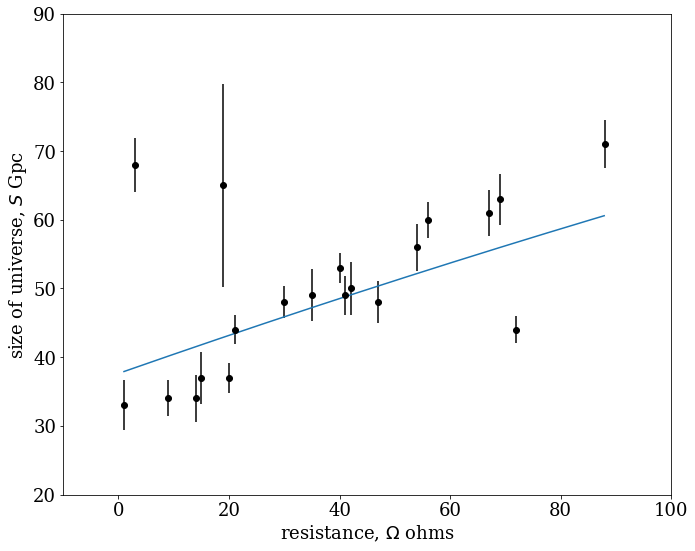

In [18]:
plt.errorbar(x, y, e, fmt='ok')
plt.plot(xf, yf)
niceplot()

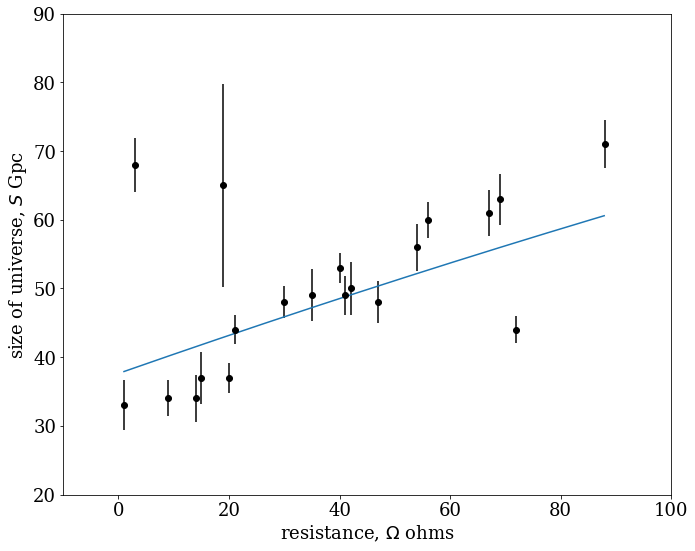

In [19]:
plt.errorbar(x, y, e, fmt='ok')
plt.plot(xf, yf)
niceplot()

In [21]:
# perform a 5-sigma clipping
ok = abs(residuals(result_fit, x, y, e)) < 5.0
xc, yc, ec = [z[ok] for z in (x, y, e)]

In [22]:
result_fit, cov_fit = optimize.curve_fit(model, xc, yc, sigma=ec, absolute_sigma=True)
yfc = model(xf, *result_fit) #star notation unpacks a list of arguments

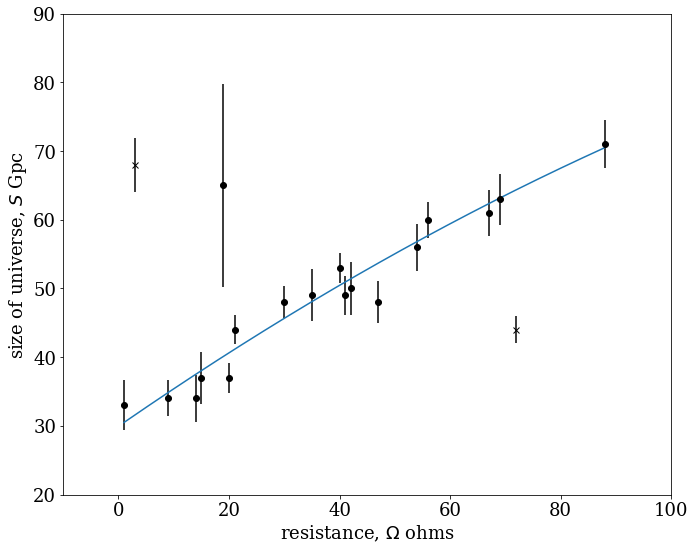

In [23]:
plt.errorbar(xc, yc, ec, fmt='ok')
# tilde means logical NOT, can be used as such in a numpy array
plt.errorbar(x[~ok], y[~ok], e[~ok], fmt='xk')
plt.plot(xf, yfc)
niceplot()